In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
df = pd.read_excel('stm概率分布.xlsx')
df

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,topic,国家全称,摘要(全英),申请日
0,0,0.005171,0.009283,0.856202,0.011051,0.030111,0.009264,0.006508,0.055391,0.017019,V3,United States,The problem solved by the present invention is...,2019
1,1,0.001747,0.007716,0.005325,0.957331,0.000646,0.006365,0.001490,0.003673,0.015707,V4,Singapore,The present invention relates to a pesticide n...,2018
2,2,0.002997,0.010882,0.008778,0.927169,0.001187,0.009357,0.002260,0.006293,0.031076,V4,United States,Microparticle constructs stabilized by an amph...,2005
3,3,0.003091,0.019806,0.020037,0.827918,0.001976,0.011756,0.006109,0.085775,0.023532,V4,India,The present invention provides antimicrobial c...,2015
4,4,0.000635,0.003235,0.009823,0.005360,0.001165,0.002274,0.002370,0.970026,0.005112,V8,Canada,carbon nanotube production system is used to i...,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,2571,0.001316,0.005282,0.004777,0.967624,0.000515,0.005056,0.001230,0.003002,0.011199,V4,China,The invention belongs to the field of nano pes...,2023
2572,2572,0.000709,0.003548,0.002143,0.980089,0.000214,0.002873,0.000701,0.001762,0.007961,V4,China,The invention belongs to the field of nano pes...,2023
2573,2573,0.003572,0.289735,0.019989,0.401583,0.001514,0.013856,0.227630,0.014275,0.027847,V4,China,The invention belongs to the field of nano pes...,2023
2574,2574,0.003406,0.010985,0.588003,0.007012,0.010180,0.007349,0.005289,0.277888,0.089889,V3,China,The invention belongs to the field of nano pes...,2023


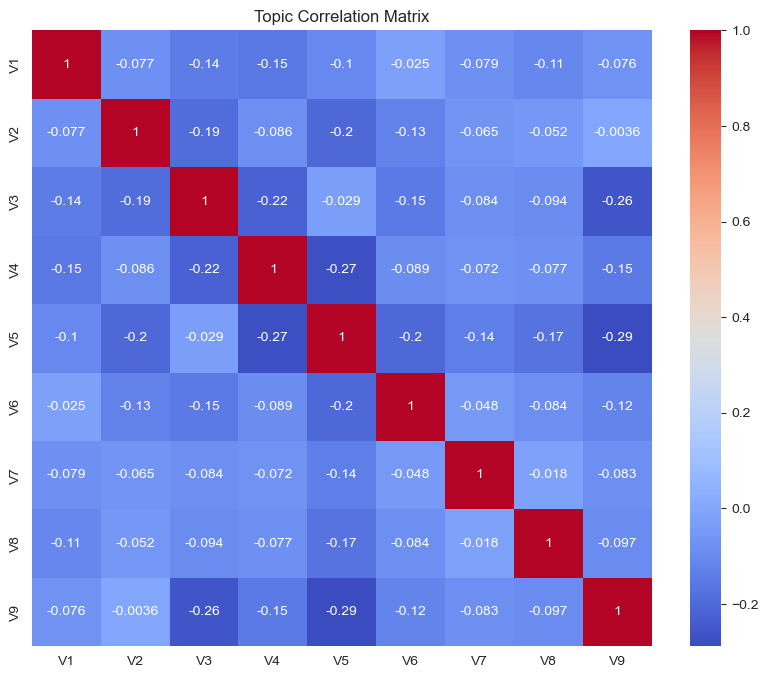

In [3]:
# correlation matrix
correlation_matrix = df.drop(columns=['申请日','topic', '国家全称', '摘要(全英)','Unnamed: 0']).corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Topic Correlation Matrix')
plt.show()

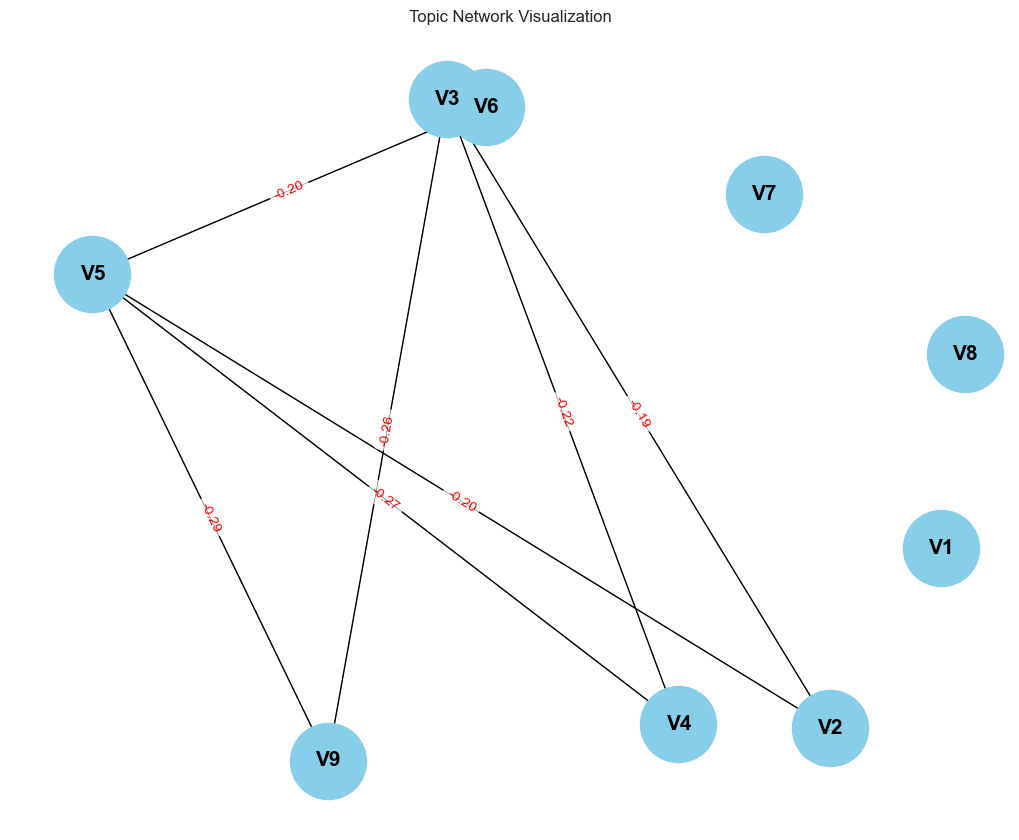

In [22]:
# network
G = nx.Graph()

# add nodes
for topic in correlation_matrix.columns:
    G.add_node(topic)

# add edges
threshold = 0.180 
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j], weight=correlation_matrix.iloc[i, j])

# draw network
pos = nx.spring_layout(G)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}, font_color='red')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights)

plt.title('Topic Network Visualization')
plt.show()

In [23]:
from pyecharts import options as opts
from pyecharts.charts import Graph

# Construct network diagram
nodes = [{"name": topic} for topic in correlation_matrix.columns]
links = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            links.append({"source": correlation_matrix.columns[i], "target": correlation_matrix.columns[j], "value": correlation_matrix.iloc[i, j]})


nodes = []
for topic in correlation_matrix.columns:
    if topic in ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9']:
        nodes.append({"name": topic, "symbol": "image://china.png"})
    elif topic in ['V4',]:
        nodes.append({"name": topic, "symbol": "image://us.png"})
    else:
        nodes.append({"name": topic})

# Graph
graph = (
    Graph(init_opts=opts.InitOpts(width="1500px", height="1000px"))
    .add("", nodes, links, repulsion=8000, linestyle_opts=opts.LineStyleOpts(width=0.5, curve=0.3, opacity=0.7),symbol_size=50)
    .set_global_opts(title_opts=opts.TitleOpts(title="Topic Network Visualization"))
)
graph.render_notebook()

In [24]:
from pyecharts import options as opts
from pyecharts.charts import Graph

# 构建网络图
nodes = [{"name": topic} for topic in correlation_matrix.columns]
links = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            links.append({"source": correlation_matrix.columns[i], "target": correlation_matrix.columns[j], "value": correlation_matrix.iloc[i, j]})


nodes = []
for topic in correlation_matrix.columns:
        nodes.append({"name": topic})

# 创建一个Graph实例
graph = (
    Graph(init_opts=opts.InitOpts(width="1500px", height="1000px"))
    .add("", nodes, links, repulsion=8000, linestyle_opts=opts.LineStyleOpts(width=0.5, curve=0.3, opacity=0.7),symbol_size=50)
    .set_global_opts(title_opts=opts.TitleOpts(title="Topic Network Visualization"))
)

# 渲染图像
graph.render('topic_network.html')

'C:\\Users\\RIC_ZX\\Desktop\\code-agr\\STM\\topic_network.html'

In [25]:
graph.render_notebook()

In [36]:
import pandas as pd
data = pd.read_excel('主题.xlsx')
data

,主题
0,主题1: 水稻种植技术
1,主题2: 农业气候数据管理和存储地理信息
2,主题3: 植物育种和高温耐受性和不同作物的适应性研究
3,主题4: 农业机械和灾害应对和害虫防治
4,主题5: 农业信息系统开发和应用
5,主题6: 智能灌溉和物联网（IoT）
6,主题7: 农作物生长模型和气候影响
7,主题8: 环境控制与空气质量管理
8,主题9: 畜牧业与太阳能应用
9,主题10: 农业灾害预警系统


In [47]:
data['主题代号'] = data['主题'].str[:3]
if data.index.max() < 10:
    data['主题名称'] = data['主题'].str[4:]
    data['主题代号'] = data['主题'].str[:2]
else:
    data['主题名称'] = data['主题'].str[5:]
    data['主题代号'] = data['主题'].str[:4]
data

,主题,主题代号,主题名称
0,主题1: 水稻种植技术,主题1:,水稻种植技术
1,主题2: 农业气候数据管理和存储地理信息,主题2:,农业气候数据管理和存储地理信息
2,主题3: 植物育种和高温耐受性和不同作物的适应性研究,主题3:,植物育种和高温耐受性和不同作物的适应性研究
3,主题4: 农业机械和灾害应对和害虫防治,主题4:,农业机械和灾害应对和害虫防治
4,主题5: 农业信息系统开发和应用,主题5:,农业信息系统开发和应用
5,主题6: 智能灌溉和物联网（IoT）,主题6:,智能灌溉和物联网（IoT）
6,主题7: 农作物生长模型和气候影响,主题7:,农作物生长模型和气候影响
7,主题8: 环境控制与空气质量管理,主题8:,环境控制与空气质量管理
8,主题9: 畜牧业与太阳能应用,主题9:,畜牧业与太阳能应用
9,主题10: 农业灾害预警系统,主题10,农业灾害预警系统


In [48]:
data.to_excel('主题.xlsx', index=False)